In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers

warnings.filterwarnings('ignore')


In [58]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [60]:
print(f'Train Data: {data_train.shape}\nTest Data: {data_test.shape}')



Train Data: (7352, 563)
Test Data: (2947, 563)


In [62]:
print("Train Data Sütun Sayısı: ", data_train.shape[0])
print("Train Data Satır Sayısı: ", data_train.shape[1])
print("Test Data Sütun Sayısı: ", data_test.shape[0])
print("Test Data Satır Sayısı: ", data_test.shape[1])

Train Data Sütun Sayısı:  7352
Train Data Satır Sayısı:  563
Test Data Sütun Sayısı:  2947
Test Data Satır Sayısı:  563


In [64]:
#DataFrame'de tüm Satırların gözükmesi için kullandım
pd.set_option("display.max_columns", None)

#Eksik veri kontrolü yapıyorum görüldüğü üzere null değer yok
df = df = pd.read_csv("test.csv")
print("\nEksik Veri Sayısı:\n", df.isnull().sum())




Eksik Veri Sayısı:
 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [66]:
# veri setinde her bir satır için tekrarlanan verilerin olup olmadığını kontrol ediyorum.
data_train.duplicated().any()



False

In [68]:
# Aynı işlemi sütunları satır gibi okumak için Transpoze alıp kontrol ediyorum.
duplicated_columns = data_train.columns[data_train.T.duplicated()].tolist()
len(duplicated_columns)

21

In [70]:
# axis = 0 satır axis = 1 sütunları ifade ediyor tekrar eden sütunları çıkarıp yazdırıyorum
data_train = data_train.drop(duplicated_columns, axis = 1)
data_train.shape

(7352, 542)

In [72]:
# Tekrarlayan sütunları test setinden de çıkarıyorum
data_test = data_test.drop(duplicated_columns, axis=1)
data_test.shape


(2947, 542)

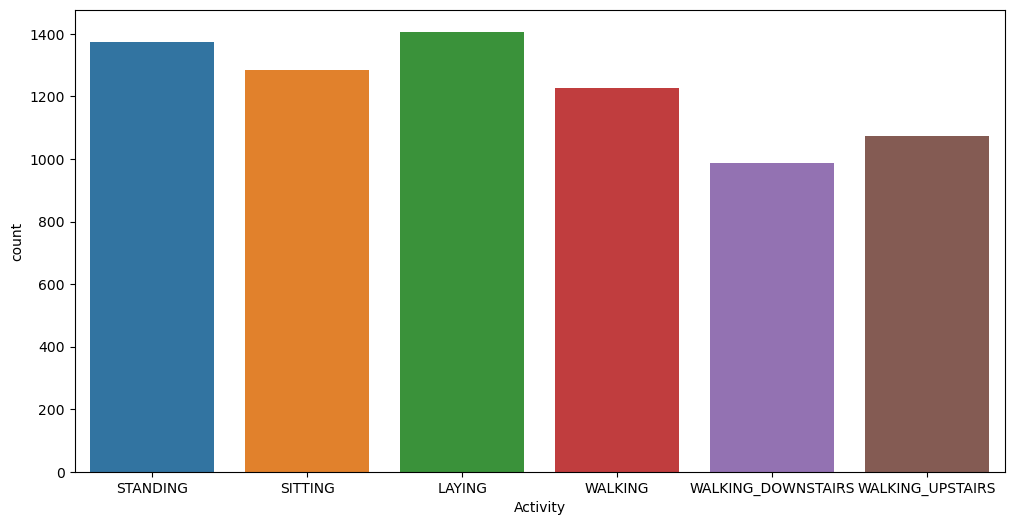

In [74]:
#veri setinde activity'de bulunan kategorilerin kaç defa tekrar ettiğini gösteren grafiği çizdiriyorum

plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=data_train, hue="Activity")
plt.xticks(x=data_train['Activity'])
plt.show()

In [76]:
# Mak.Ögr. Algoritmaları ile analiz yapacağımız için veri setini features ve target olarak ayırıyoruz
# X' te Activity Sütunu çıkarıldı y'de ise sadece activity bulunuyor, features'i kullanarak tahminleme yapacağız
X = data_train.drop('Activity', axis = 1)
y = data_train['Activity']
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [78]:
x_train, y_train = data_train.iloc[:, :-2], data_train.iloc[:, -1:]
x_test, y_test = data_test.iloc[:, :-2], data_test.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 540), (7352, 1))

In [80]:
x_test, y_test = data_test.iloc[:, :-2], data_test.iloc[:, -1:]
x_test.shape, y_test.shape

((2947, 540), (2947, 1))

In [82]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
y_train = lbl.fit_transform(y_train)
y_test = lbl.fit_transform(y_test)

In [84]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape


((2947, 540), (2947,), (7352, 540), (7352,))

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

In [88]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs= 10,validation_data = (x_test,y_test))

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3767 - loss: 1.5140 - val_accuracy: 0.6861 - val_loss: 1.0408
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6893 - loss: 0.9632 - val_accuracy: 0.8107 - val_loss: 0.7421
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.6842 - val_accuracy: 0.8466 - val_loss: 0.5442
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.5054 - val_accuracy: 0.8775 - val_loss: 0.4326
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8767 - loss: 0.4024 - val_accuracy: 0.8884 - val_loss: 0.3669
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9047 - loss: 0.3240 - val_accuracy: 0.9131 - val_loss: 0.3062
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9107 - loss: 0.2898 - val_accuracy: 0.8948 - val_loss: 0.2875
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.2596 - val_accuracy: 0.

In [90]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(
            Dropout(0.2))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()

Reloading Tuner from project\Human_activity_recognition\tuner0.json
Search space summary
Default search space size: 22
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
initializer (Choice)
{'default': 'uniform', 'conditions': [], 'values': ['uniform', 'normal'], 'ordered': False}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 

In [92]:
tuner.search(x_train, y_train,
             epochs= 10,
             validation_data=(x_test, y_test))

In [94]:
tuner.results_summary()


Results summary
Results in project\Human_activity_recognition
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 19
units0: 128
initializer: normal
activation: tanh
units1: 160
units2: 512
units3: 96
units4: 384
units5: 192
units6: 448
units7: 128
units8: 512
units9: 128
units10: 224
units11: 512
units12: 160
units13: 288
units14: 32
units15: 416
units16: 384
units17: 64
units18: 32
Score: 0.3429476320743561

Trial 3 summary
Hyperparameters:
num_layers: 12
units0: 288
initializer: normal
activation: sigmoid
units1: 512
units2: 320
units3: 32
units4: 416
units5: 32
units6: 192
units7: 320
units8: 192
units9: 320
units10: 448
units11: 192
units12: 512
units13: 384
units14: 96
units15: 320
units16: 224
units17: 448
units18: 96
Score: 0.18221920728683472

Trial 0 summary
Hyperparameters:
num_layers: 18
units0: 256
initializer: normal
activation: relu
units1: 128
units2: 32
units3: 32
units4: 32
units5: 32
units6: 32
units7: 

In [96]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=51, validation_data=(x_test,y_test))

Epoch 1/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3288 - loss: 3.8641 - val_accuracy: 0.3505 - val_loss: 1.1109
Epoch 2/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3530 - loss: 3.9788 - val_accuracy: 0.3488 - val_loss: 1.1039
Epoch 3/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3480 - loss: 3.7843 - val_accuracy: 0.3505 - val_loss: 1.1037
Epoch 4/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3499 - loss: 3.8224 - val_accuracy: 0.3346 - val_loss: 1.1059
Epoch 5/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3435 - loss: 3.8762 - val_accuracy: 0.3488 - val_loss: 1.1041
Epoch 6/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3445 - loss: 3.7005 - val_accuracy: 0.3505 - val_loss: 1.1071
Epoch 7/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3318 - loss: 3.8995 - val_accuracy: 0.3346 - val_loss: 1.1043
Epoch 8/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3413 - loss: 3.6567 - val_accuracy: 0.

In [52]:
model.summary()
import tensorflow as tf

from tensorflow import keras

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fitt = model.fit(x_train,y_train, epochs=200, validation_data=(x_test,y_test), callbacks=Callback)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        69,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 160)            │        20,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 96)             │        49,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 384)            │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 192)            │        73,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 448)            │        86,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 224)            │        28,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       115,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 160)            │        82,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 288)            │        46,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 416)            │        13,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 384)            │       160,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,272,852 (12.48 MB)

 Trainable params: 1,090,950 (4.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,181,902 (8.32 MB)

Epoch 1/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3366 - loss: 3.7868 - val_accuracy: 0.3346 - val_loss: 1.1107
Epoch 2/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3404 - loss: 3.7848 - val_accuracy: 0.3505 - val_loss: 1.1099
Epoch 3/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3334 - loss: 3.5947 - val_accuracy: 0.3505 - val_loss: 1.1088
Epoch 4/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3460 - loss: 3.9455 - val_accuracy: 0.3346 - val_loss: 1.1081


ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

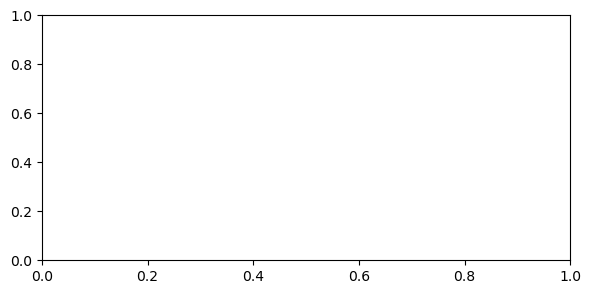

In [54]:
accuracy = mo_fitt.history['accuracy']
loss = mo_fitt.history['loss']
validation_loss = mo_fitt.history['val_loss']
validation_accuracy = mo_fitt.history['val_accuracy']


plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.plot(range(5), accuracy, label='Training Accuracy')
plt.plot(range(5), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()